In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from scipy.stats import zscore
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('/content/drive/MyDrive/cars data.csv')

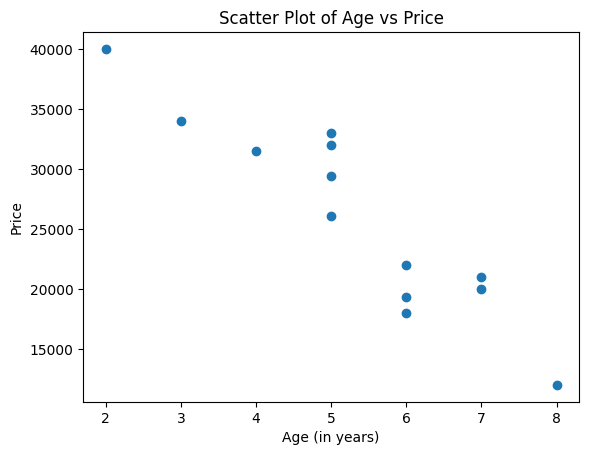

In [11]:
plt.scatter(data['Age(yrs)'], data['Sell Price($)'])
plt.title('Scatter Plot of Age vs Price')
plt.xlabel('Age (in years)')
plt.ylabel('Price')
plt.show()

In [12]:
le = LabelEncoder()
data['Car Model'] = le.fit_transform(data['Car Model'])

In [13]:
X = data[['Car Model', 'Age(yrs)', 'Mileage']]
y = data['Sell Price($)']

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


z_scores = zscore(X_scaled)
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
X_filtered = X_scaled[filtered_entries]
y_filtered = y[filtered_entries]

In [15]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_filtered, y_filtered)

RandomForestRegressor(random_state=42)

In [16]:
mercedez_benz_prediction = model.predict([[le.transform(['Mercedez Benz C class'])[0], 4, 45000]])
bmw_x5_prediction = model.predict([[le.transform(['BMW X5'])[0], 7, 86000]])


y_pred = model.predict(X_filtered)
accuracy = 1 - mean_squared_error(y_filtered, y_pred) / mean_squared_error(y_filtered, [y_filtered.mean()] * len(y_filtered))


print(f"Predicted price of a 4-year-old Mercedez Benz with mileage 45000: ${round(mercedez_benz_prediction[0], 2)}")
print(f"Predicted price of a 7-year-old BMW x5 with mileage 86000: ${round(bmw_x5_prediction[0], 2)}")
print(f"Model Accuracy: {accuracy*100:.2f}%")

Predicted price of a 4-year-old Mercedez Benz with mileage 45000: $14986.0
Predicted price of a 7-year-old BMW x5 with mileage 86000: $14986.0
Model Accuracy: 97.05%
